In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as stats

np.set_printoptions(threshold=np.inf)

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

split_int = 4
add_on_int = 2

In [16]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [17]:
# Import Data
CD44_control_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_CD44_control_pred.xlsx", ["single_cell", "background"])
CD44_control_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_CD44_control_target.xlsx", ["single_cell", "background"])

CD44_dox_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_CD44_dox_pred.xlsx", ["single_cell", "background"])
CD44_dox_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_CD44_dox_target.xlsx", ["single_cell", "background"])

# Standardize Data to Background
CD44_control_pred["single_cell"].Mean = CD44_control_pred["single_cell"].Mean - np.mean (CD44_control_pred["background"].Mean)
CD44_control_target["single_cell"].Mean = CD44_control_target["single_cell"].Mean - np.mean (CD44_control_target["background"].Mean)
CD44_dox_pred["single_cell"].Mean = CD44_dox_pred["single_cell"].Mean - np.mean (CD44_dox_pred["background"].Mean)
CD44_dox_target["single_cell"].Mean = CD44_dox_target["single_cell"].Mean - np.mean (CD44_dox_target["background"].Mean)

# Split Data
CD44_control_pred_array = np.array_split(np.array(CD44_control_pred["single_cell"].Mean),split_int)
CD44_control_target_array = np.array_split(np.array(CD44_control_target["single_cell"].Mean),split_int)
CD44_dox_pred_array = np.array_split(np.array(CD44_dox_pred["single_cell"].Mean),split_int)
CD44_dox_target_array = np.array_split(np.array(CD44_dox_target["single_cell"].Mean),split_int)

# Pearson Correlation Coefficient
CD44_control_pearsonr_values = []
for pred, target in zip(CD44_control_pred_array, CD44_control_target_array):
    CD44_control_pearsonr_values.append(pearsonr_1D(pred,target))

CD44_dox_pearsonr_values = []
for pred, target in zip(CD44_dox_pred_array, CD44_dox_target_array):
    CD44_dox_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(CD44_control_pearsonr_values)
print(CD44_dox_pearsonr_values)

[0.8490883135530138, 0.756517433551812, 0.5937980397150633, 0.5638937821203152]
[0.30471690091865505, 0.7099663123890949, 0.9431071964236799, 0.49300748292488705]


In [18]:
# Import Data
p16_control_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p16_control_pred.xlsx", ["single_cell", "background"])
p16_control_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p16_control_target.xlsx", ["single_cell", "background"])

p16_dox_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p16_dox_pred.xlsx", ["single_cell", "background"])
p16_dox_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p16_dox_target.xlsx", ["single_cell", "background"])

# Standardize Data to Background
p16_control_pred["single_cell"].Mean = p16_control_pred["single_cell"].Mean - np.mean (p16_control_pred["background"].Mean)
p16_control_target["single_cell"].Mean = p16_control_target["single_cell"].Mean - np.mean (p16_control_target["background"].Mean)
p16_dox_pred["single_cell"].Mean = p16_dox_pred["single_cell"].Mean - np.mean (p16_dox_pred["background"].Mean)
p16_dox_target["single_cell"].Mean = p16_dox_target["single_cell"].Mean - np.mean (p16_dox_target["background"].Mean)

# Split Data
p16_control_pred_array = np.array_split(np.array(p16_control_pred["single_cell"].Mean),split_int)
p16_control_target_array = np.array_split(np.array(p16_control_target["single_cell"].Mean),split_int)
p16_dox_pred_array = np.array_split(np.array(p16_dox_pred["single_cell"].Mean),split_int)
p16_dox_target_array = np.array_split(np.array(p16_dox_target["single_cell"].Mean),split_int)

# Pearson Correlation Coefficient
p16_control_pearsonr_values = []
for pred, target in zip(p16_control_pred_array, p16_control_target_array):
    p16_control_pearsonr_values.append(pearsonr_1D(pred,target))

p16_dox_pearsonr_values = []
for pred, target in zip(p16_dox_pred_array, p16_dox_target_array):
    p16_dox_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(p16_control_pearsonr_values)
print(p16_dox_pearsonr_values)

[0.9617852614828548, 0.9448958706902562, 0.9736282296555242, 0.9360836433162829]
[0.3260500200626033, 0.9909713553734523, 0.851325339752814, 0.8322640300431577]


In [19]:
# Import Data
p21_control_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p21_control_pred.xlsx", ["single_cell", "background"])
p21_control_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p21_control_target.xlsx", ["single_cell", "background"])

p21_dox_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p21_dox_pred.xlsx", ["single_cell", "background"])
p21_dox_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p21_dox_target.xlsx", ["single_cell", "background"])

# Standardize Data to Background
p21_control_pred["single_cell"].Mean = p21_control_pred["single_cell"].Mean - np.mean (p21_control_pred["background"].Mean)
p21_control_target["single_cell"].Mean = p21_control_target["single_cell"].Mean - np.mean (p21_control_target["background"].Mean)
p21_dox_pred["single_cell"].Mean = p21_dox_pred["single_cell"].Mean - np.mean (p21_dox_pred["background"].Mean)
p21_dox_target["single_cell"].Mean = p21_dox_target["single_cell"].Mean - np.mean (p21_dox_target["background"].Mean)

# Split Data
p21_control_pred_array = np.array_split(np.array(p21_control_pred["single_cell"].Mean),split_int)
p21_control_target_array = np.array_split(np.array(p21_control_target["single_cell"].Mean),split_int)
p21_dox_pred_array = np.array_split(np.array(p21_dox_pred["single_cell"].Mean),split_int)
p21_dox_target_array = np.array_split(np.array(p21_dox_target["single_cell"].Mean),split_int)

# Pearson Correlation Coefficient
p21_control_pearsonr_values = []
for pred, target in zip(p21_control_pred_array, p21_control_target_array):
    p21_control_pearsonr_values.append(pearsonr_1D(pred,target))

p21_dox_pearsonr_values = []
for pred, target in zip(p21_dox_pred_array, p21_dox_target_array):
    p21_dox_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(p21_control_pearsonr_values)
print(p21_dox_pearsonr_values)

[0.6110032099126893, 0.5167228625714928, 0.8531613978813504, -0.10765219470460019]
[0.8446327889833662, 0.9026185518241139, 0.7532281926220793, 0.9426500602996143]


In [20]:
# Import Data
p38_control_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p38_control_pred.xlsx", ["single_cell", "background"])
p38_control_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p38_control_target.xlsx", ["single_cell", "background"])

p38_dox_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p38_dox_pred.xlsx", ["single_cell", "background"])
p38_dox_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p38_dox_target.xlsx", ["single_cell", "background"])

# Standardize Data to Background
p38_control_pred["single_cell"].Mean = p38_control_pred["single_cell"].Mean - np.mean (p38_control_pred["background"].Mean)
p38_control_target["single_cell"].Mean = p38_control_target["single_cell"].Mean - np.mean (p38_control_target["background"].Mean)
p38_dox_pred["single_cell"].Mean = p38_dox_pred["single_cell"].Mean - np.mean (p38_dox_pred["background"].Mean)
p38_dox_target["single_cell"].Mean = p38_dox_target["single_cell"].Mean - np.mean (p38_dox_target["background"].Mean)

# Split Data
p38_control_pred_array = np.array_split(np.array(p38_control_pred["single_cell"].Mean),split_int)
p38_control_target_array = np.array_split(np.array(p38_control_target["single_cell"].Mean),split_int)
p38_dox_pred_array = np.array_split(np.array(p38_dox_pred["single_cell"].Mean),split_int+add_on_int)
p38_dox_target_array = np.array_split(np.array(p38_dox_target["single_cell"].Mean),split_int+add_on_int)

# Pearson Correlation Coefficient
p38_control_pearsonr_values = []
for pred, target in zip(p38_control_pred_array, p38_control_target_array):
    p38_control_pearsonr_values.append(pearsonr_1D(pred,target))

p38_dox_pearsonr_values = []
for pred, target in zip(p38_dox_pred_array, p38_dox_target_array):
    p38_dox_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(p38_control_pearsonr_values)
print(p38_dox_pearsonr_values)

[0.9055061662302051, 0.8000442506615645, 0.6253734252036326, 0.9714335834468388]
[0.5419626281206648, 0.14811288569393924, 0.6940949918123709, 0.4941936874106197, 0.8348890710832905, 0.3561553369776108]


In [21]:
# Import Data
SABG_control_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_SABG_control_pred.xlsx", ["single_cell", "background"])
SABG_control_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_SABG_control_target.xlsx", ["single_cell", "background"])

SABG_dox_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_SABG_dox_pred.xlsx", ["single_cell", "background"])
SABG_dox_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_SABG_dox_target.xlsx", ["single_cell", "background"])

# Standardize Data to Background
SABG_control_pred["single_cell"].Mean = SABG_control_pred["single_cell"].Mean - np.mean (SABG_control_pred["background"].Mean)
SABG_control_target["single_cell"].Mean = SABG_control_target["single_cell"].Mean - np.mean (SABG_control_target["background"].Mean)
SABG_dox_pred["single_cell"].Mean = SABG_dox_pred["single_cell"].Mean - np.mean (SABG_dox_pred["background"].Mean)
SABG_dox_target["single_cell"].Mean = SABG_dox_target["single_cell"].Mean - np.mean (SABG_dox_target["background"].Mean)

# Split Data
SABG_control_pred_array = np.array_split(np.array(SABG_control_pred["single_cell"].Mean),split_int+add_on_int)
SABG_control_target_array = np.array_split(np.array(SABG_control_target["single_cell"].Mean),split_int+add_on_int)
SABG_dox_pred_array = np.array_split(np.array(SABG_dox_pred["single_cell"].Mean),split_int+add_on_int)
SABG_dox_target_array = np.array_split(np.array(SABG_dox_target["single_cell"].Mean),split_int+add_on_int)

# Pearson Correlation Coefficient
SABG_control_pearsonr_values = []
for pred, target in zip(SABG_control_pred_array, SABG_control_target_array):
    SABG_control_pearsonr_values.append(pearsonr_1D(pred,target))

SABG_dox_pearsonr_values = []
for pred, target in zip(SABG_dox_pred_array, SABG_dox_target_array):
    SABG_dox_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(SABG_control_pearsonr_values)
print(SABG_dox_pearsonr_values)

[-0.23359887283430544, 0.41493915792193903, 0.7085003624741907, 0.7581044246322541, 0.9042911343472606, 0.8351181900725344]
[0.3743932745056493, 0.12846460662557885, 0.4482762025110767, 0.7465510199571216, 0.7059288091740599, 0.8414760492307982]


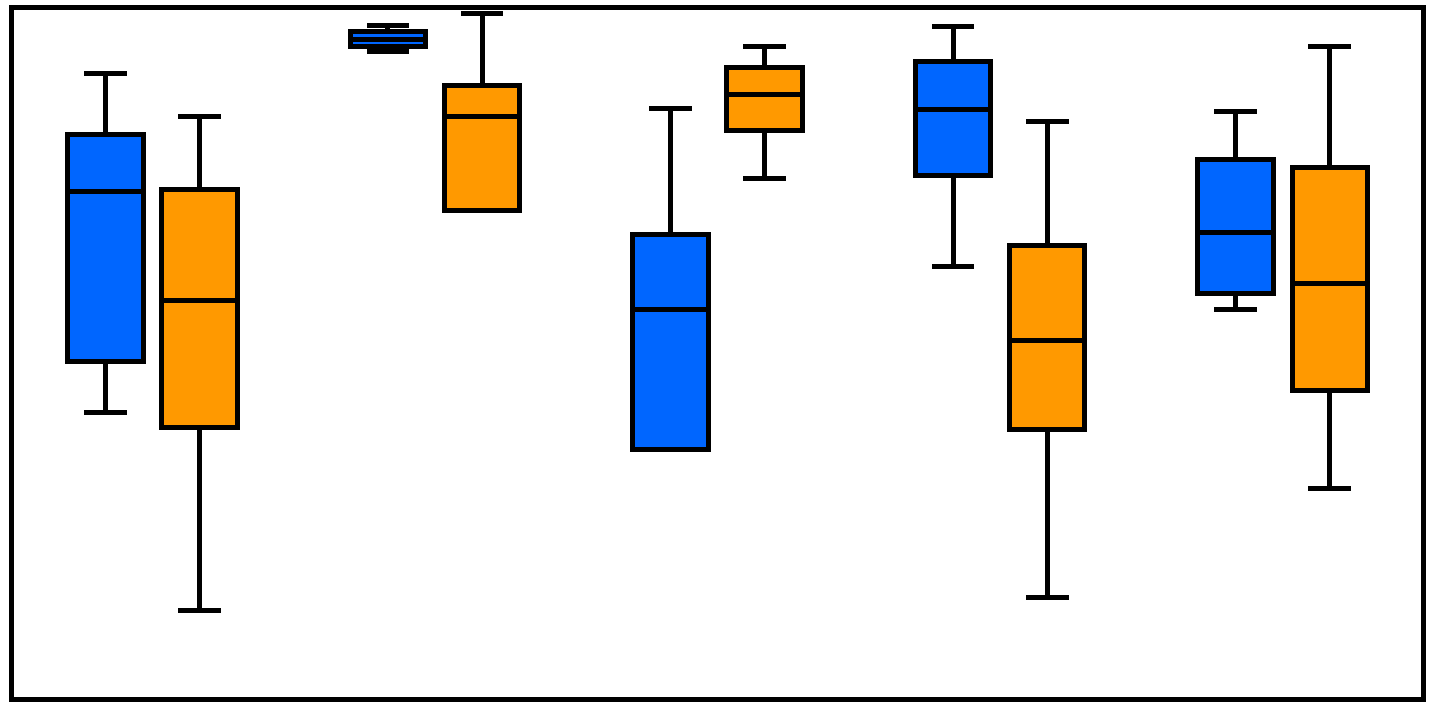

In [22]:
fig, ax = plt.subplots(figsize = [20,10])

plt.ylim(0,1)
ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

color1 = '#0066ff'
color2 = '#ff9900'

def set_box_color (bp):
    plt.setp (bp['boxes'][0], color = 'black', facecolor = color1)
    plt.setp (bp['whiskers'][0], color = 'black')
    plt.setp (bp['whiskers'][1], color = 'black')
    plt.setp (bp['caps'][0], color = 'black')
    plt.setp (bp['caps'][1], color = 'black')
    plt.setp (bp['medians'][0], color = 'black')
    plt.setp (bp['medians'][0], color = 'black')
    
    plt.setp (bp['boxes'][1], color = 'black', facecolor = color2)
    plt.setp (bp['whiskers'][2], color = 'black')
    plt.setp (bp['whiskers'][3], color = 'black')
    plt.setp (bp['caps'][2], color = 'black')
    plt.setp (bp['caps'][3], color = 'black')
    plt.setp (bp['medians'][1], color = 'black')
    plt.setp (bp['medians'][1], color = 'black')


    # Rectangular Box Plot with Data
boxprops = dict(linestyle='-', linewidth=5)
medianprops = dict(linestyle='-', linewidth=5)
meanprops = dict(linestyle='-', linewidth=5)
whiskerproprs = dict(linestyle='-', linewidth=5)

SABG_bplot = ax.boxplot ([SABG_control_pearsonr_values, SABG_dox_pearsonr_values],  boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [1,2],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (SABG_bplot)

for whisker in SABG_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in SABG_bplot['caps']:
    caps.set(linewidth = 5)
    
p16_bplot = ax.boxplot ([p16_control_pearsonr_values, p16_dox_pearsonr_values],  boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [4,5],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (p16_bplot)

for whisker in p16_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in p16_bplot['caps']:
    caps.set(linewidth = 5)
    
p21_bplot = ax.boxplot ([p21_control_pearsonr_values, p21_dox_pearsonr_values],  boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [7,8],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (p21_bplot)

for whisker in p21_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in p21_bplot['caps']:
    caps.set(linewidth = 5)

p38_bplot = ax.boxplot ([p38_control_pearsonr_values, p38_dox_pearsonr_values],  boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist = True, positions = [10,11],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (p38_bplot)

for whisker in p38_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in p38_bplot['caps']:
    caps.set(linewidth = 5)

CD44_bplot = ax.boxplot ([CD44_control_pearsonr_values, CD44_dox_pearsonr_values], boxprops = boxprops, medianprops=medianprops, meanprops = meanprops, vert = True, patch_artist=True, positions = [13,14],  widths = 0.8, showfliers=False)
set_box_color (CD44_bplot)

for whisker in CD44_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in CD44_bplot['caps']:
    caps.set(linewidth = 5)

# Organize Plot
plt.xlim (0, 15)
plt.ylim (0, 1)
ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
ax.set_xticklabels (['CD44', 'p16', 'p21', 'p38', 'SABG'])

# plt.title ("Single Cell Pearson Correlation Coefficient")
plt.ylabel ("r")

# control_label = mpatches.Patch(facecolor=color1, edgecolor = 'black', linewidth = 5, label = "                 ")
# dox_label = mpatches.Patch(facecolor=color2, edgecolor = 'black', linewidth = 5, label = "                   ")
# plt.legend(handles=[control_label, dox_label], frameon=False, fontsize = 70, borderpad = 0, labelspacing = 0, handlelength = 2)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# Add combined in addition to Control and Dox

plt.tight_layout()
plt.savefig(fname="dox_pearson")

In [23]:
print (np.mean(CD44_control_pearsonr_values))
print (np.mean(CD44_dox_pearsonr_values))

0.690824392235051
0.6126994731640792


In [24]:
print (np.mean(p16_control_pearsonr_values))
print (np.mean(p16_dox_pearsonr_values))

0.9540982512862295
0.7501526863080068


In [25]:
print (np.mean(p21_control_pearsonr_values))
print (np.mean(p21_dox_pearsonr_values))

0.4683088189152331
0.8607823984322934


In [26]:
print (np.mean(p38_control_pearsonr_values))
print (np.mean(p38_dox_pearsonr_values))

0.8255893563855603
0.5115681001830826


In [27]:
print (np.mean(SABG_control_pearsonr_values))
print (np.mean(SABG_dox_pearsonr_values))

0.5645590661023122
0.5408483270007141


In [28]:
total_pearsonr_values = CD44_control_pearsonr_values
total_pearsonr_values += CD44_dox_pearsonr_values
total_pearsonr_values += p16_control_pearsonr_values
total_pearsonr_values += p16_dox_pearsonr_values
total_pearsonr_values += p21_control_pearsonr_values
total_pearsonr_values += p21_dox_pearsonr_values
total_pearsonr_values += p38_control_pearsonr_values
total_pearsonr_values += p38_dox_pearsonr_values
total_pearsonr_values += SABG_control_pearsonr_values
total_pearsonr_values += SABG_dox_pearsonr_values
print (np.mean(total_pearsonr_values))

0.6598190101439667
